## Predict tags on StackOverflow with linear models

In [1]:
! wget https://raw.githubusercontent.com/hse-aml/natural-language-processing/master/setup_google_colab.py -O setup_google_colab.py

--2019-06-21 02:41:40--  https://raw.githubusercontent.com/hse-aml/natural-language-processing/master/setup_google_colab.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2330 (2.3K) [text/plain]
Saving to: ‘setup_google_colab.py’

setup_google_colab. 100%[===================>]   2.28K  --.-KB/s    in 0s      

2019-06-21 02:41:40 (60.4 MB/s) - ‘setup_google_colab.py’ saved [2330/2330]



In [0]:
import setup_google_colab

In [0]:
setup_google_colab.setup_week1()

In this notebook, will learn how to predict tags for posts from [StackOverflow](https://stackoverflow.com). 

To solve this task you will use multilabel classification approach.

### Libraries

In this task you will need the following libraries:
- [Numpy](http://www.numpy.org) — a package for scientific computing.
- [Pandas](https://pandas.pydata.org) — a library providing high-performance, easy-to-use data structures and data analysis tools for the Python
- [scikit-learn](http://scikit-learn.org/stable/index.html) — a tool for data mining and data analysis.
- [NLTK](http://www.nltk.org) — a platform to work with natural language.

### Data

The following cell will download all data required for this assignment into the folder `week1/data`.

In [4]:
import sys
sys.path.append("..")
from common.download_utils import download_week1_resources

download_week1_resources()

### Text preprocessing

For this and most of the following assignments you will need to use a list of stop words. It can be downloaded from *nltk*:

In [5]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In this task you will deal with a dataset of post titles from StackOverflow. You are provided a split to 3 sets: *train*, *validation* and *test*. All corpora (except for *test*) contain titles of the posts and corresponding tags (100 tags are available). The *test* set is provided for Coursera's grading and doesn't contain answers. Upload the corpora using *pandas* and look at the data:

In [0]:
from ast import literal_eval
import pandas as pd
import numpy as np

### Reading the data

Safely evaluate an expression node or a Unicode or Latin-1 encoded string containing a Python expression. The string or node provided may only consist of the following Python literal structures: strings, numbers, tuples, lists, dicts, booleans, and None.

*literal_eval* can be used for safely evaluating strings containing Python expressions from untrusted sources without the need to parse the values oneself.

In [0]:
def read_data(filename):
    data = pd.read_csv(filename, sep='\t')
    data['tags'] = data['tags'].apply(literal_eval)
    return data

In [0]:
train = read_data('data/train.tsv')
validation = read_data('data/validation.tsv')
test = pd.read_csv('data/test.tsv', sep='\t')

In [9]:
train.head()

,title,tags
0,How to draw a stacked dotplot in R?,[r]
1,mysql select all records where a datetime fiel...,"[php, mysql]"
2,How to terminate windows phone 8.1 app,[c#]
3,get current time in a specific country via jquery,"[javascript, jquery]"
4,Configuring Tomcat to Use SSL,[java]


As you can see, *title* column contains titles of the posts and *tags* column contains the tags. 

**It could be noticed that a number of tags for a post is not fixed and could be as many as necessary.**

For a more comfortable usage, initialize *X_train*, *X_val*, *X_test*, *y_train*, *y_val*.

In [0]:
X_train, y_train = train['title'].values, train['tags'].values
X_val, y_val = validation['title'].values, validation['tags'].values
X_test = test['title'].values

One of the most known difficulties when working with natural data is that it's unstructured. For example, if you use it "as is" and extract tokens just by splitting the titles by whitespaces, you will see that there are many "weird" tokens like *3.5?*, *"Flip*, etc. To prevent the problems, it's usually useful to prepare the data somehow. 

**Task 1 (TextPrepare).** We will implement the function *text_prepare* for basic text preprocessing. After that, run the function *test_test_prepare* to test it on tiny cases.

In [0]:
import re

In [0]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def text_prepare(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = re.sub(REPLACE_BY_SPACE_RE, ' ', text)# replace REPLACE_BY_SPACE_RE symbols by space in text
    text = re.sub(BAD_SYMBOLS_RE, '', text)# delete symbols which are in BAD_SYMBOLS_RE from text
    text = re.sub(re.compile(r'\b(?:%s)\b' % '|'.join(list(STOPWORDS))), '', text)# delete stopwords from text
    text = re.sub(' +',' ', text).strip()
    return text

#### Test case for *text_prepare(text)* function

In [0]:
def test_text_prepare():
    examples = ["SQL Server - any equivalent of Excel's CHOOSE function?",
                "How to free c++ memory vector<int> * arr?"]
    answers = ["sql server equivalent excels choose function", 
               "free c++ memory vectorint arr"]
    for ex, ans in zip(examples, answers):
        if text_prepare(ex) != ans:
            return "Wrong answer for the case: '%s'" % ex
    return 'Basic tests are passed.'

In [14]:
print(test_text_prepare())

Basic tests are passed.


Run your implementation for questions from file *text_prepare_tests.tsv*


In [15]:
prepared_questions = []
for line in open('data/text_prepare_tests.tsv', encoding='utf-8'):
    line = text_prepare(line.strip())
    prepared_questions.append(line)
text_prepare_results = '\n'.join(prepared_questions)

print("TextPrepare implementation result: {}".format(text_prepare_results))


TextPrepare implementation result: sqlite php readonly
creating multiple textboxes dynamically
self one prefer javascript
save php date string mysql database timestamp
fill dropdownlist data xml file aspnet application
programmatically trigger jqueryui draggables drag event
get value method argument via reflection java
knockout mapingfromjs observablearray json object data gets lost
facebook connect localhost weird stuff
fullcalendar prev next click
syntaxerror unexpected token
effective way float double comparison
gem install rails fails dns error
listshuttle component richfaces getting updated
laravel responsedownload show images laravel
wrong rspec test
calendar display using java swing
python selenium import regular firefox profile addons
random number 2 variables values
altering http responses firefox extension
start session python web application
align radio buttons horizontally django forms
count number rows sqlite database
wordpress wp_rewrite rules
removing sheet excel 2005 us

Now we can preprocess the titles using function *text_prepare* and  making sure that the headers don't have bad symbols:

In [0]:
X_train = [text_prepare(x) for x in X_train]
X_val = [text_prepare(x) for x in X_val]
X_test = [text_prepare(x) for x in X_test]

In [17]:
len(X_train)

100000

In [18]:
len(y_train)

100000

In [19]:
### first 3 entires in training data
print(X_train[:3])
print('--------------------------------------------------------')
print(y_train[:3])

['draw stacked dotplot r', 'mysql select records datetime field less specified value', 'terminate windows phone 81 app']
--------------------------------------------------------
[list(['r']) list(['php', 'mysql']) list(['c#'])]


In [20]:
type(y_train)

numpy.ndarray

In [21]:
y_train.shape

(100000,)

Let's check the validation and test dataset size!

In [22]:
print('Size of validation dataset',len(X_val))
print('Size of test dataset',len(X_test))


Size of validation dataset 30000
Size of test dataset 20000


For each tag and for each word, let's calculate how many times they occur in the train corpus. 

**Task 2 (WordsTagsCount).** 

Let's find 3 most popular tags and 3 most popular words in the **train data**.



In [0]:
# Dictionary of all tags from train corpus with their counts.
tags_counts = {}
# Dictionary of all words from train corpus with their counts.
words_counts = {}


import collections

mylist_words=" ".join(X_train)
words_counts = dict(collections.Counter(mylist_words.split()))

mylist_tags = [item for sublist in y_train for item in sublist]
tags_counts = dict(collections.Counter(mylist_tags))

Also check out counts of words and tags in the **train data**

In [24]:
print('total count of words',len(words_counts))
print('total count of tags',len(tags_counts))

total count of words 31479
total count of tags 100


So now we have *tags_counts* and *words_counts* dictionaries of the form `{'some_word_or_tag': frequency}`. 

After applying the sorting procedure, results will be look like this: `[('most_popular_word_or_tag', frequency), ('less_popular_word_or_tag', frequency), ...]`. 


In [25]:
most_common_tags = sorted(tags_counts.items(), key=lambda x: x[1], reverse=True)[:3]
most_common_words = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)[:3]


print('Most common tags ', (','.join(tag for tag, _ in most_common_tags)))
print('Most common words ',  (','.join(word for word, _ in most_common_words)))

Most common tags  javascript,c#,java
Most common words  using,php,java


### Transforming text to a vector

Machine Learning algorithms work with numeric data and we cannot use the provided text data "as is". There are many ways to transform text data to numeric vectors. In this task you will try to use two of them.

#### Bag of words

One of the well-known approaches is a *bag-of-words* representation. To create this transformation, follow the steps:
1. Find *N* most popular words in train corpus and numerate them. Now we have a dictionary of the most popular words.
2. For each title in the corpora create a zero vector with the dimension equals to *N*.
3. For each text in the corpora iterate over words which are in the dictionary and increase by 1 the corresponding coordinate.

Let's try to do it for a toy example. Imagine that we have *N* = 4 and the list of the most popular words is 

    ['hi', 'you', 'me', 'are']

Then we need to numerate them, for example, like this: 

    {'hi': 0, 'you': 1, 'me': 2, 'are': 3}

And we have the text, which we want to transform to the vector:

    'hi how are you'

For this text we create a corresponding zero vector 

    [0, 0, 0, 0]
    
And iterate over all words, and if the word is in the dictionary, we increase the value of the corresponding position in the vector:

    'hi':  [1, 0, 0, 0]
    'how': [1, 0, 0, 0] # word 'how' is not in our dictionary
    'are': [1, 0, 0, 1]
    'you': [1, 1, 0, 1]

The resulting vector will be 

    [1, 1, 0, 1]
   
Implement the described encoding in the function *my_bag_of_words* with the size of the dictionary equals to 5000. To find the most common words use train data. You can test your code using the function *test_my_bag_of_words*.

In [0]:
dict_size = 5000
dict_words = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)[:dict_size]
dict_words = ','.join(word for word, _ in dict_words).split(',')
WORDS_TO_INDEX = { dict_words[i]:i for i in range(len(dict_words) ) }
INDEX_TO_WORDS = { i:dict_words[i] for i in range(len(dict_words) ) }
ALL_WORDS = WORDS_TO_INDEX.keys()

def my_bag_of_words(text, words_to_index, dict_size):
    """
        text: a string
        dict_size: size of the dictionary
        
        return a vector which is a bag-of-words representation of 'text'
    """
    result_vector = np.zeros(dict_size)
    
    for myword in text.split():
      for key,value in words_to_index.items():
        if myword==key:
          result_vector[value]=1
    
    result_vector=result_vector.tolist()
    result_vector=[int(item1) for item1 in result_vector]
    return result_vector

In [0]:
def test_my_bag_of_words():
    words_to_index = {'hi': 0, 'you': 1, 'me': 2, 'are': 3}
    examples = ['hi how are you']
    answers = [[1, 1, 0, 1]]
    for ex, ans in zip(examples, answers):
        if (my_bag_of_words(ex, words_to_index, 4) != ans):
            return "Wrong answer for the case: '%s'" % ex
    return 'Basic tests are passed.'

In [28]:
print(test_my_bag_of_words())

Basic tests are passed.


Now apply the implemented function to all samples (this might take up to a minute):

In [0]:
from scipy import sparse as sp_sparse

In [0]:
DICT_SIZE=5000

In [31]:
X_train_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_train])
X_val_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_val])
X_test_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_test])
print('X_train shape ', X_train_mybag.shape)
print('X_val shape ', X_val_mybag.shape)
print('X_test shape ', X_test_mybag.shape)

X_train shape  (100000, 5000)
X_val shape  (30000, 5000)
X_test shape  (20000, 5000)


Notice that we have transformed the data to sparse representation, to store the useful information efficiently. 

There are many [types](https://docs.scipy.org/doc/scipy/reference/sparse.html) of such representations, however sklearn algorithms can work only with [csr](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html#scipy.sparse.csr_matrix) matrix, so we will use this one.


The Compressed Sparse Row, also called CSR for short, is often used to represent sparse matrices in machine learning given the efficient access and matrix multiplication that it supports.

**Compressed Sparse Row**: The sparse matrix is represented using three one-dimensional arrays for the non-zero values, the extents of the rows, and the column indexes.

**Task 3 (BagOfWords).** Now let's find how many non-zero elements the 11th row in *X_train_mybag* contains.

In [32]:
row = X_train_mybag[10].toarray()[0]
non_zero_elements_count = np.sum(row)####### YOUR CODE HERE #######
print('BagOfWords non zero count: {}'.format(str(non_zero_elements_count)))


BagOfWords non zero count: 7


#### TF-IDF

The second approach extends the bag-of-words framework by taking into account total frequencies of words in the corpora. It helps to penalize too frequent words and provide better features space. 

Implement function *tfidf_features* using class [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) from *scikit-learn*. Use *train* corpus to train a vectorizer. Don't forget to take a look into the arguments that you can pass to it. We suggest that you filter out too rare words (occur less than in 5 titles) and too frequent words (occur more than in 90% of the titles). Also, use bigrams along with unigrams in your vocabulary. 

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
def tfidf_features(X_train, X_val, X_test):
    """
        X_train, X_val, X_test — samples        
        return TF-IDF vectorized representation of each sample and vocabulary
    """
    # Create TF-IDF vectorizer with a proper parameters choice
    # Fit the vectorizer on the train set
    # Transform the train, test, and val sets and return the result
    
    
    tfidf_vectorizer = TfidfVectorizer(min_df=5, max_df=0.9, token_pattern = '(\S+)', ngram_range=(1, 2))####### YOUR CODE HERE #######
    X_train = tfidf_vectorizer.fit_transform(X_train)
    
    X_val = tfidf_vectorizer.transform(X_val)
    X_test = tfidf_vectorizer.transform(X_test)
    
    
    return X_train, X_val, X_test, tfidf_vectorizer.vocabulary_

Once you have done text preprocessing, always have a look at the results. Be very careful at this step, because the performance of future models will drastically depend on it. 

In this case, check whether you have c++ or c# in your vocabulary, as they are obviously important tokens in our tags prediction task:

In [0]:
X_train_tfidf, X_val_tfidf, X_test_tfidf, tfidf_vocab = tfidf_features(X_train, X_val, X_test)
tfidf_reversed_vocab = {i:word for word,i in tfidf_vocab.items()}

In [36]:
for key,value in tfidf_vocab.items():
  if(key=='c++' or key=='c#'):
    print('present')

present
present


### MultiLabel classifier: preparing labels!

As we have noticed before, in this task each example can have multiple tags. To deal with such kind of prediction, *we need to transform labels in a binary form and the prediction will be a mask of 0s and 1s*. For this purpose it is convenient to use [MultiLabelBinarizer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MultiLabelBinarizer.html) from *sklearn*.

In [0]:
from sklearn.preprocessing import MultiLabelBinarizer

In [0]:
mlb = MultiLabelBinarizer(classes=sorted(tags_counts.keys()))

y_train = mlb.fit_transform(y_train)
y_val = mlb.fit_transform(y_val)

Next we need to implement the function *train_classifier* for training a classifier. 

In this task we will use **One-vs-Rest approach**, which is implemented in [OneVsRestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html) class. 

In this approach *k* classifiers (= number of tags) are trained. 

As a basic classifier, use [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). It is one of the simplest methods, but often it performs good enough in text classification tasks. It might take some time, because a number of classifiers to train is large.

In [0]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [0]:
def train_classifier(X_train, y_train):
    """
      X_train, y_train — training data
      
      return: trained classifier
    """
    
    # Create and fit LogisticRegression wraped into OneVsRestClassifier.

    ######################################
    ######### YOUR CODE HERE #############
    clf = OneVsRestClassifier(LogisticRegression(penalty='l2',C=10))
    clf.fit(X_train,y_train)
    
    return clf
    ######################################    

Train the classifiers for different data transformations: *bag-of-words* and *tf-idf*.

In [41]:
classifier_mybag = train_classifier(X_train_mybag, y_train)
classifier_tfidf = train_classifier(X_train_tfidf, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Now you can create predictions for the data. You will need two types of predictions: labels and scores.

In [0]:
y_val_predicted_labels_mybag = classifier_mybag.predict(X_val_mybag)
y_val_predicted_scores_mybag = classifier_mybag.decision_function(X_val_mybag)

y_val_predicted_labels_tfidf = classifier_tfidf.predict(X_val_tfidf)
y_val_predicted_scores_tfidf = classifier_tfidf.decision_function(X_val_tfidf)

In [43]:
y_val_predicted_labels_mybag.shape

(30000, 100)

In [44]:
y_val_predicted_scores_mybag.shape

(30000, 100)

In [45]:
y_val.shape

(30000, 100)

Now take a look at how classifier, which uses TF-IDF, works for a few examples:

In [46]:
y_val_pred_inversed = mlb.inverse_transform(y_val_predicted_labels_tfidf)
y_val_inversed = mlb.inverse_transform(y_val)
for i in range(6):
    print('Title:\t{}\nTrue labels:\t{}\nPredicted labels:\t{}\n\n'.format(
        X_val[i],
        ','.join(y_val_inversed[i]),
        ','.join(y_val_pred_inversed[i])
    ))

Title:	odbc_exec always fail
True labels:	php,sql
Predicted labels:	


Title:	access base classes variable within child class
True labels:	javascript
Predicted labels:	c#


Title:	contenttype application json required rails
True labels:	ruby,ruby-on-rails
Predicted labels:	ruby-on-rails


Title:	sessions sinatra used pass variable
True labels:	ruby,session
Predicted labels:	ruby


Title:	getting error type json exist postgresql rake db migrate
True labels:	json,ruby,ruby-on-rails
Predicted labels:	json,ruby-on-rails


Title:	library found
True labels:	c++,ios,iphone,xcode
Predicted labels:	




Now, we would need to compare the results of different predictions, e.g. to see whether TF-IDF transformation helps or to try different regularization techniques in logistic regression. For all these experiments, we need to setup evaluation procedure. 

### Evaluation

To evaluate the results we will use several classification metrics:
 - [Accuracy](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
 - [F1-score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)
 - [Area under ROC-curve](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)
 - [Area under precision-recall curve](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html#sklearn.metrics.average_precision_score) 
 


In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

Implement the function *print_evaluation_scores* which calculates and prints to stdout:
 - *accuracy*
 - *F1-score macro/micro/weighted*
 - *Precision macro/micro/weighted*

In [0]:
def print_evaluation_scores(y_val, predicted):
    
    
    print("Accuracy is {}".format(accuracy_score(y_val,predicted)))
    
    
    ##Calculate F1 metrics for each label, 
    ##and find their average weighted by support (the number of true instances for each label)
    print("F1-score is {}".format(f1_score(y_val, predicted, average='weighted')))
    
    print("Average_Precision_score is {}".format(average_precision_score(y_val, predicted, average='weighted')))
   

In [49]:
print('Bag-of-words')
print_evaluation_scores(y_val, y_val_predicted_labels_mybag)
print('Tfidf')
print_evaluation_scores(y_val, y_val_predicted_labels_tfidf)

Bag-of-words
Accuracy is 0.3532
F1-score is 0.6540351920832762
Average_Precision_score is 0.5040894990324603
Tfidf
Accuracy is 0.36323333333333335
F1-score is 0.6541464059472133
Average_Precision_score is 0.5104312665557028


You might also want to plot some generalization of the [ROC curve](http://scikit-learn.org/stable/modules/model_evaluation.html#receiver-operating-characteristic-roc) for the case of multi-label classification. Provided function *roc_auc* can make it for you. The input parameters of this function are:
 - true labels
 - decision functions scores
 - number of classes

check out https://github.com/hse-aml/natural-language-processing/blob/master/week1/metrics.py

In [0]:
from metrics import roc_auc
%matplotlib inline

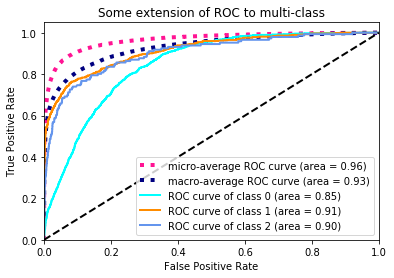

In [51]:
n_classes = len(tags_counts)
roc_auc(y_val, y_val_predicted_scores_mybag, n_classes)

In [52]:
n_classes

100

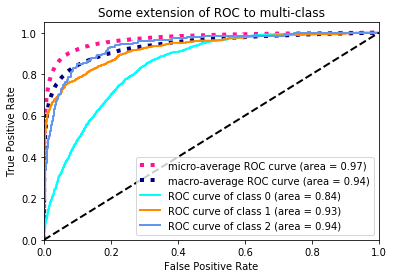

In [53]:
n_classes = len(tags_counts)
roc_auc(y_val, y_val_predicted_scores_tfidf, n_classes)

### Test Data

In [54]:
test_predictions = classifier_tfidf.predict(X_test_tfidf)
test_pred_inversed = mlb.inverse_transform(test_predictions)

test_predictions = '\n'.join('%i\t%s' % (i, ','.join(row)) for i, row in enumerate(test_pred_inversed))

print('MultilabelClassification: {}'.format(test_predictions))


MultilabelClassification: 0	mysql,php
1	html,javascript,jquery
2	
3	javascript,jquery
4	android,java
5	parsing,php,xml
6	json
7	java,swing
8	file,python
9	html
10	jquery,php,sql
11	r
12	php
13	ruby-on-rails
14	asp.net,c#
15	python
16	c++
17	ajax,html,javascript,jquery,ruby-on-rails
18	
19	c,c++,linux,sockets
20	python
21	pandas,python
22	c++,multithreading
23	c#
24	php,wordpress
25	c
26	ruby,ruby-on-rails
27	c#,wpf
28	python
29	r
30	html,javascript,jquery
31	c#
32	html,javascript
33	python
34	hibernate,java,spring
35	
36	c#,wpf,xaml
37	javascript
38	php
39	java
40	java,sockets
41	c#
42	javascript,jquery
43	eclipse,java
44	c#
45	php
46	c#
47	
48	
49	c++,eclipse
50	javascript,jquery
51	c#
52	c++
53	javascript
54	google-maps,javascript
55	
56	python
57	c#,winforms
58	ios,javascript,objective-c
59	html,javascript
60	
61	date,javascript
62	c#
63	
64	django
65	c,python
66	string
67	file,python
68	
69	javascript
70	javascript,jquery
71	c++
72	python
73	
74	python
75	ajax,php
76	
77	
78	c#
79	